ValueError: X has 4 features, but SVC is expecting 16 features as input.

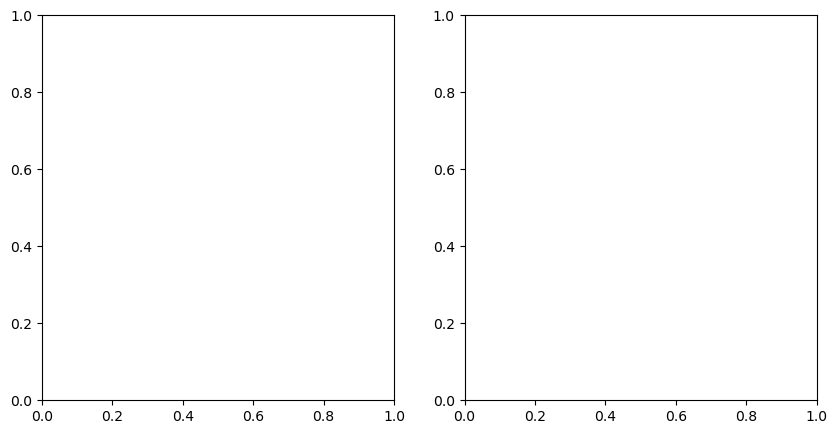

In [6]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler

def get_assignments(n):
    assignments = []
    for i in range(2**n):
        assignment = np.zeros(n)
        binary = bin(i)[2:].zfill(n)
        for j in range(n):
            if binary[j] == '1':
                assignment[j] = 1
        assignments.append(assignment)
    return assignments

def square_transform(X, c):
    n = X.shape[1]
    assignments = get_assignments(n)
    new_X = np.zeros((X.shape[0], 2**n))
    for i in range(X.shape[0]):
        for j, assignment in enumerate(assignments):
            new_X[i, j] = np.dot(X[i], c**assignment)
    return new_X

def get_transform(c):
    return lambda X: square_transform(X, c)

def compare_results(X, y, C):
    pca = PCA(n_components=2)
    X_PCA = pca.fit_transform(StandardScaler().fit_transform(X))
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    for idx, c in enumerate([1, 2, 3, 4]):
        X_phi = square_transform(X, c)
        svc = SVC(kernel='linear', C=C)
        svc.fit(X_phi, y)

        XX, YY = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
        Z = svc.predict(square_transform(np.c_[XX.ravel(), YY.ravel()], c))
        Z = Z.reshape(XX.shape)
        ax[idx%2].contourf(XX, YY, Z, alpha=0.4)
        ax[idx%2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, alpha=0.8)
        ax[idx%2].set_title(f"c={c}")

        poly_svc = SVC(kernel='poly', degree=2, C=C, coef0=1, gamma='auto')
        poly_svc.fit(X_PCA, y)
        Z = poly_svc.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        ax[idx%2].contour(XX, YY, Z, colors='k', linestyles=['--'])

    plt.show()

X_iris, y_iris = load_iris(return_X_y=True)
y_iris = np.where(y_iris == 1, 1, 0)  # Versicolor vs rest
compare_results(X_iris, y_iris, C=100)

X_cancer, y_cancer = load_breast_cancer(return_X_y=True)
compare_results(X_cancer, y_cancer, C=100)


In [9]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import StandardScaler


def get_assignments(n):
    assignments = []
    ones = np.ones((n, 1))
    for i in range(2**n):
        assignment = np.zeros(n)
        binary = bin(i)[2:].zfill(n)
        for j in range(n):
            if binary[j] == '1':
                assignment[j] = ones[j]
        assignments.append(assignment)
    return assignments


def square_transform(X, c):
    n = X.shape[1]
    assignments = get_assignments(n)
    new_X = []
    for i in range(X.shape[0]):
        new_x = []
        for j, assignment in enumerate(assignments):
            # using matrix dot product
            new_x.append(np.dot(X[i], (c**assignment)))
        new_X.append(new_x)
    return np.array(new_X)


def get_transform(c):
    return lambda X: square_transform(X, c)


def compare_results(X, y, C):
    pca = PCA(n_components=2)
    X_PCA = pca.fit_transform(StandardScaler().fit_transform(X))

    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    ax = axes.ravel()
    Cs = [1, 2, 3, 4]

    for idx, c in enumerate(Cs):
        X_transform = get_transform(c)(X)
        svc = SVC(kernel='linear', C=C)
        svc.fit(X_transform, y)

        XX, YY = np.meshgrid(
            np.arange(-2, 2, 0.025), np.arange(-2, 2, 0.025))
        Z = svc.predict(get_transform(c)(np.c_[XX.ravel(), YY.ravel()]))
        Z = Z.reshape(XX.shape)
        ax[idx].contourf(XX, YY, Z, cmap=plt.cm.coolwarm, alpha=0.5)
        ax[idx].scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.8)
        ax[idx].set_title(f"c={c}")

        poly_svc = SVC(kernel='poly', degree=2, C=C, coef0=1, gamma='auto')
        poly_svc.fit(X_PCA, y)
        Z = poly_svc.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        ax[idx].contour(XX, YY, Z, colors='k', linestyles=['--'])

    plt.show()





X_iris, y_iris = load_iris(return_X_y=True)
y_ = np.zeros_like(y_iris)

# se utiliza np.where para convertir la variable 'y_iris' a una variable binaria 
# (1 donde 'y' es igual a 0, 0 donde 'y' es diferente de 0)
y_ = np.where(y_iris == 0, 1, 0)

# se imprimen los valores de 'X_iris' y 'y_'
print('X_iris:', X_iris)
print('y_:', y_)


X_iris: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.